In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

# Import estimators
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Import model metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score

# Import cross validation
from sklearn.cross_validation import train_test_split

C:\Users\twkmn\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#raw data for out of box modelling
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [4]:
#remove ID 
rawData.drop('ID', axis = 1, inplace=True)
#rename 'default payment next month' to DEFAULT
rawData.rename(columns={'default payment next month':'DEFAULT'}, inplace = True)
rawData.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [5]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [6]:
#features
features = rawData.iloc[:,0:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [7]:
#dependent variable
depVar = rawData['DEFAULT']
depVar.head()

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [8]:
#Training Set (Feature Space: X Training)
X_train = (features[: 15000])
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [9]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 15000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 15000


0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [10]:
#Testing Set (X Testing)
X_test = features[-4500:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 4500
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
25500     140000    2          3         2   29      0      0      2      0   
25501     200000    2          1         2   31      1     -1     -1     -2   
25502     250000    2          1         1   31     -1     -1     -1     -1   
25503     260000    2          1         1   32      1     -2     -2     -2   
25504     220000    2          2         2   28     -1     -1     -2     -2   

       PAY_5    ...     BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
25500      0    ...        149237     132330     122464      54494     14500   
25501     -2    ...             0          0          0          0       896   
25502     -1    ...          3186       5161          0      13714      7404   
25503     -1    ...             0          0        238          0         0   
25504     -2    ...             0          0          0       

In [11]:
#Ground Truth (y_test) 
y_test = depVar[-4500:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 4500


25500    0
25501    0
25502    0
25503    0
25504    1
Name: DEFAULT, dtype: int64

In [12]:
#cross validation
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = .30, random_state = 1)
X_train.shape, X_test.shape

((10500, 23), (4500, 23))

# Models

In [13]:
# Models
modelRF = RandomForestClassifier()
modelKNN = KNeighborsClassifier()
modelSVC = SVC()
modelGBC = GradientBoostingClassifier()

In [14]:
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [15]:
#dependent variable
depVar[0:5,]

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [16]:
#fit models
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
modelSVC.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
modelGBC.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [20]:
#model fitting and scoring RF
modelRF.fit(X_train, y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train, y_train)

[0.79148815 0.79142857 0.78965419]


0.9782857142857143

In [21]:
#model fitting and scoring KNN
modelKNN.fit(X_train, y_train)
print(cross_val_score(modelKNN, X_train, y_train))
modelKNN.score(X_train, y_train)

[0.74150243 0.75314286 0.74021149]


0.8106666666666666

In [22]:
#model fitting and scoring SVC
modelSVC.fit(X_train, y_train)
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train, y_train)

[0.77692088 0.77771429 0.77650757]


0.9944761904761905

In [23]:
#model fitting and scoring GBC
modelGBC.fit(X_train, y_train)
print(cross_val_score(modelSVC, X_train, y_train))
modelGBC.score(X_train, y_train)

[0.77692088 0.77771429 0.77650757]


0.8204761904761905

In [25]:
# Make Predictions RF
predictions = modelRF.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.792
Kappa: 0.277


In [26]:
# Make Predictions KNN
predictions = modelKNN.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.742
Kappa: 0.075


In [27]:
# Make Predictions SVC
predictions = modelSVC.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.773
Kappa: 0.007


In [28]:
# Make Predictions GBC
predictions = modelGBC.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.812
Kappa: 0.349


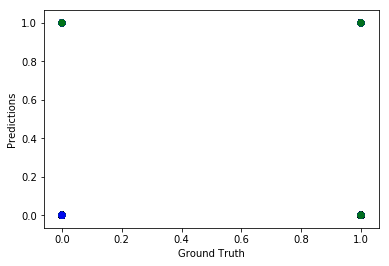

In [29]:
# Plot for GBC
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();